## **Import libraries**

In [ ]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(1234)

# **Read dataset**


In [ ]:
# Mengambil data dari URL
dataset = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/PrediksiEnergi/Power%20Consumption%20in%20City.csv'
df = pd.read_csv(dataset)

df.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data=df
data["DateTime"]=pd.to_datetime(data["DateTime"],format="%m/%d/%Y %H:%M")
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
import pandas as pd

# Mengambil data dari URL
dataset = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/PrediksiEnergi/Power%20Consumption%20in%20City.csv'
df = pd.read_csv(dataset)

# Mengubah kolom DateTime menjadi tipe data datetime
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%m/%d/%Y %H:%M")

# Mengambil bagian tanggal dari kolom DateTime
df['Date'] = df['DateTime'].dt.date

# Menghapus kolom 'DateTime'
df.drop(columns=["DateTime"], inplace=True)

# Menjadikan kolom 'Date' sebagai indeks
df.set_index('Date', inplace=True)

# Menampilkan lima baris pertama dari DataFrame yang telah dimodifikasi
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Date,,,,,,,,
2017-01-01,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
import pandas as pd

# Mengambil data dari URL
dataset = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/PrediksiEnergi/Power%20Consumption%20in%20City.csv'
df = pd.read_csv(dataset)

# Mengubah kolom DateTime menjadi tipe data datetime
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%m/%d/%Y %H:%M")

# Mengambil bagian tanggal dari kolom DateTime
df['Date'] = df['DateTime'].dt.date

# Menghapus kolom 'DateTime'
df.drop(columns=["DateTime"], inplace=True)

# Menjadikan kolom 'Date' sebagai indeks
df.set_index('Date', inplace=True)

# Mengelompokkan data berdasarkan tanggal dan menghitung rata-rata per hari
daily_average = df.groupby('Date').mean()

# Mengganti nama kolom 'Zone 2  Power Consumption' menjadi 'Zone 2 Power Consumption'
# dan 'Zone 3  Power Consumption' menjadi 'Zone 3 Power Consumption'
daily_average.rename(columns={'Zone 2  Power Consumption': 'Zone 2 Power Consumption',
                              'Zone 3  Power Consumption': 'Zone 3 Power Consumption'}, inplace=True)

# Menampilkan lima baris pertama dari DataFrame hasil perhitungan rata-rata per hari
daily_average.head()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Date,,,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707


In [ ]:
zone_1 = daily_average.loc[:, ['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows','Zone 1 Power Consumption']]
zone_1.rename(columns={'Zone 1 Power Consumption': 'Zone1PC'}, inplace=True)
zone_1.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1PC
Date,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393


In [ ]:
zone_2 = daily_average.loc[:, ['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows','Zone 2 Power Consumption']]
zone_2.rename(columns={'Zone 2 Power Consumption': 'Zone2PC'}, inplace=True)
zone_2.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone2PC
Date,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,17737.791287
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,19557.725431
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,20057.269504
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,20102.077001
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,20033.941237


In [ ]:
zone_3 = daily_average.loc[:, ['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows','Zone 3 Power Consumption']]
zone_3.rename(columns={'Zone 3 Power Consumption': 'Zone3PC'}, inplace=True)

zone_3.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone3PC
Date,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,17868.795181
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,17820.763053
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,17620.803213
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,17673.694779
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,17664.176707


In [ ]:
# Data description
data=daily_average
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.201380,11.506292,2.203759,86.162320,38.682380,2669.367965,2708.561013,4904.520670
min,8.627868,29.359861,0.064431,26.444944,19.250424,26771.518987,14779.098778,10530.612245
25%,14.196771,60.025174,0.080561,113.057799,44.595582,30531.185497,19046.519309,14265.348116
50%,19.085174,70.271111,0.236771,166.299003,67.660028,31920.994445,20807.354470,17421.566265
75%,22.872292,76.936563,4.907153,264.700498,97.551215,34100.775705,23344.342106,18933.353535
max,32.428958,89.585417,4.930493,335.065701,209.134222,38733.496116,28354.535865,32700.209205


In [ ]:
# Find number of rows and columns
print(zone_1.shape)
print(zone_2.shape)
print(zone_3.shape)

(364, 6)
(364, 6)
(364, 6)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 2017-01-01 to 2017-12-30
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               364 non-null    float64
 1   Humidity                  364 non-null    float64
 2   Wind Speed                364 non-null    float64
 3   general diffuse flows     364 non-null    float64
 4   diffuse flows             364 non-null    float64
 5   Zone 1 Power Consumption  364 non-null    float64
 6   Zone 2 Power Consumption  364 non-null    float64
 7   Zone 3 Power Consumption  364 non-null    float64
dtypes: float64(8)
memory usage: 25.6+ KB


## **Plot Time-Series**

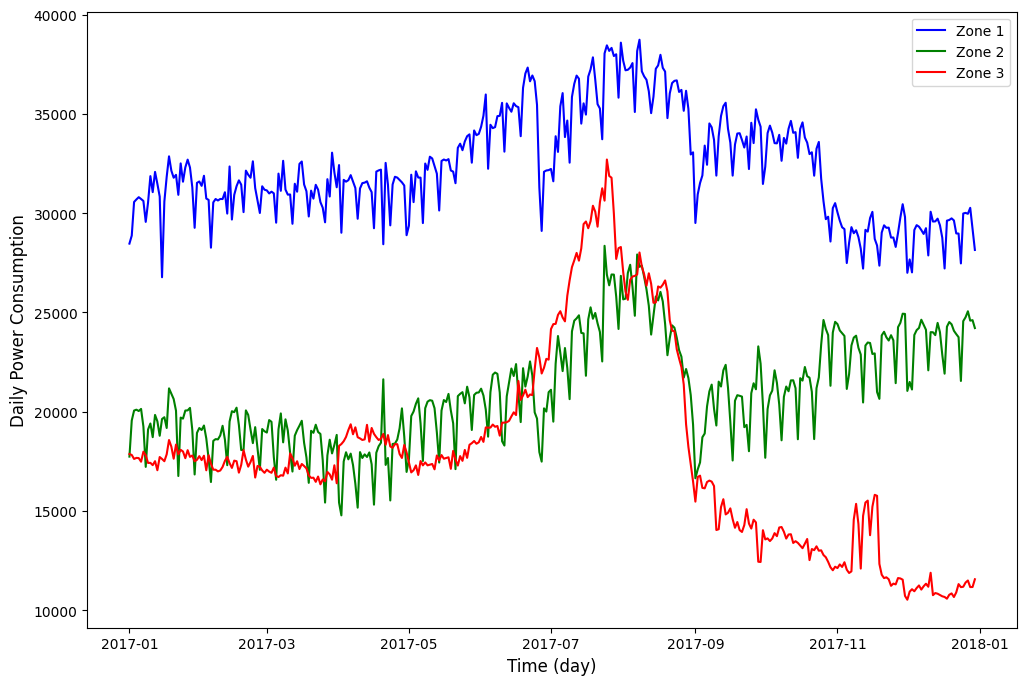

In [ ]:
# Define function to draw time series plot
def timeseries(x_axis, y_axis, x_label, y_label, color):
    plt.plot(x_axis, y_axis, color=color)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

plt.figure(figsize=(12, 8))

# Plot time series for Zone 1
timeseries(zone_1.index, zone_1['Zone1PC'], 'Time (day)',
           'Daily Power Consumption', color='blue')

# Plot time series for Zone 2
timeseries(zone_2.index, zone_2['Zone2PC'], 'Time (day)',
           'Daily Power Consumption', color='green')

# Plot time series for Zone 3
timeseries(zone_3.index, zone_3['Zone3PC'], 'Time (day)',
           'Daily Power Consumption', color='red')

# Add legend
plt.legend(['Zone 1', 'Zone 2', 'Zone 3'], loc='upper right')

# Show plot
plt.show()


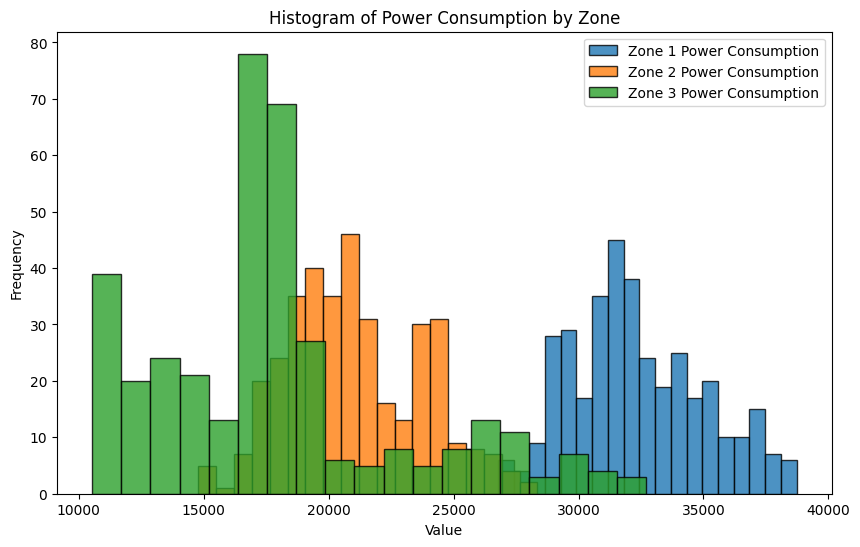

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot histogram for multiple series
def plot_histogram_multi(data, titles):
    plt.figure(figsize=(10, 6))
    for i in range(len(data)):
        plt.hist(data[i], bins=19, alpha=0.8, label=titles[i], edgecolor='black')
    plt.title("Histogram of Power Consumption by Zone")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()

# Menentukan data untuk setiap zona (Zone 1, 2, dan 3)
data_zones = [zone_1['Zone1PC'], zone_2['Zone2PC'], zone_3['Zone3PC']]

# Menentukan judul untuk setiap zona
titles_zones = ['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']

# Memanggil fungsi plot_histogram_multi dengan parameter yang sesuai
plot_histogram_multi(data_zones, titles_zones)


## **Data pre-processing**

In [ ]:
# Check missing values
print(zone_1.isnull().sum(),"\n")
print(zone_2.isnull().sum(),"\n")
print(zone_3.isnull().sum(),"\n")

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 1 Power Consumption    0
dtype: int64 

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 2 Power Consumption    0
dtype: int64 

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 3 Power Consumption    0
dtype: int64 



## **Split the dataset into train and test data**

Dimension of train data:  (291, 6)
Dimension of test data:  (73, 6)


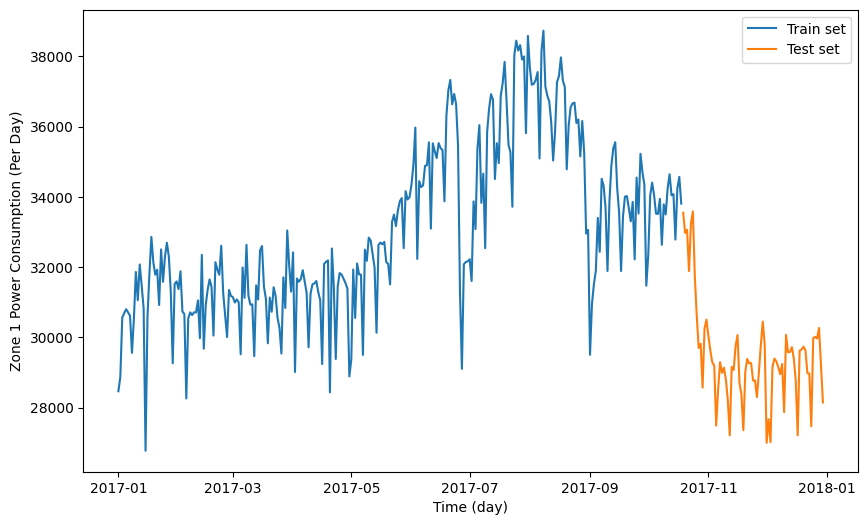

In [ ]:
train_size_zone_1 = int(len(zone_1)*0.8)
train_dataset_zone_1, test_dataset_zone_1 = zone_1.iloc[:train_size_zone_1], zone_1.iloc[train_size_zone_1:]

# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset_zone_1.Zone1PC)
plt.plot(test_dataset_zone_1.Zone1PC)
plt.xlabel('Time (day)')
plt.ylabel('Zone 1 Power Consumption (Per Day)')
plt.legend(['Train set', 'Test set'], loc='upper right')

print('Dimension of train data: ',train_dataset_zone_1.shape)
print('Dimension of test data: ', test_dataset_zone_1.shape)

Dimension of train data:  (291, 6)
Dimension of test data:  (73, 6)


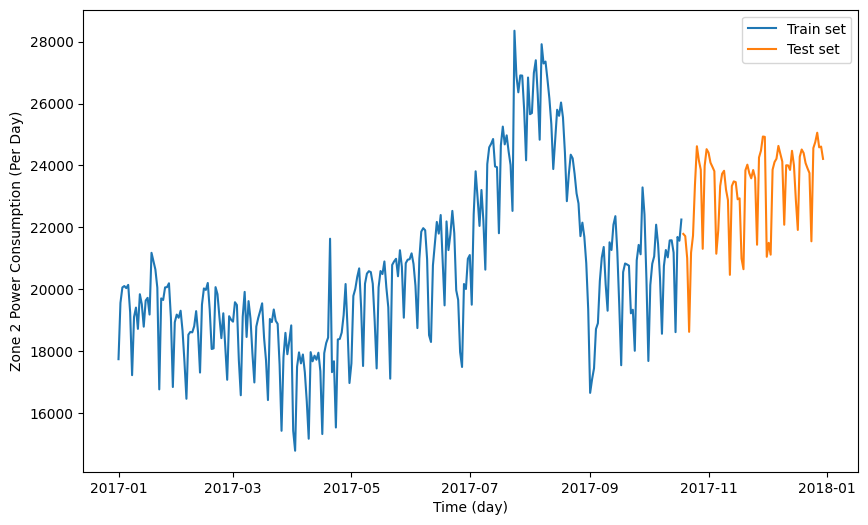

In [ ]:
train_size_zone_2 = int(len(zone_2) * 0.8)
train_dataset_zone_2, test_dataset_zone_2 = zone_2.iloc[:train_size_zone_2], zone_2.iloc[train_size_zone_2:]

# Plot train and test data
plt.figure(figsize=(10, 6))
plt.plot(train_dataset_zone_2['Zone2PC'])
plt.plot(test_dataset_zone_2['Zone2PC'])
plt.xlabel('Time (day)')
plt.ylabel('Zone 2 Power Consumption (Per Day)')
plt.legend(['Train set', 'Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset_zone_2.shape)
print('Dimension of test data: ', test_dataset_zone_2.shape)


Dimension of train data:  (291, 6)
Dimension of test data:  (73, 6)


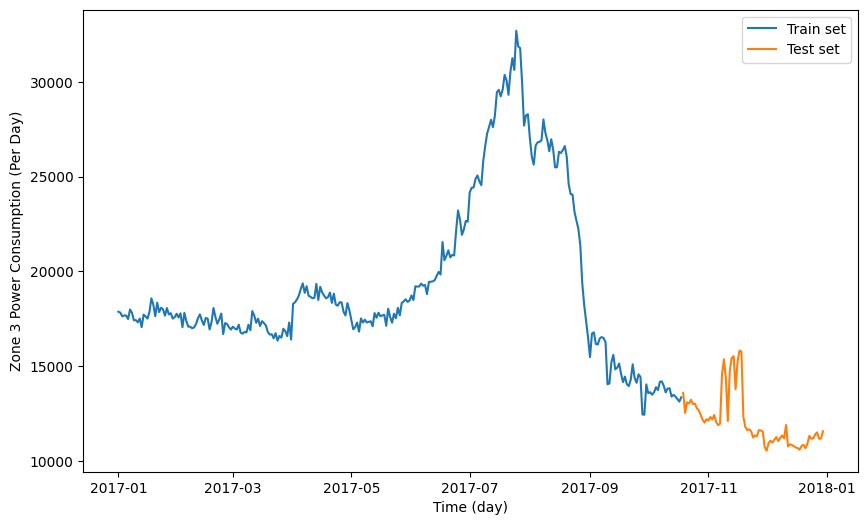

In [ ]:
train_size_zone_3 = int(len(zone_3) * 0.8)
train_dataset_zone_3, test_dataset_zone_3 = zone_3.iloc[:train_size_zone_3], zone_3.iloc[train_size_zone_3:]

# Plot train and test data
plt.figure(figsize=(10, 6))
plt.plot(train_dataset_zone_3['Zone3PC'])
plt.plot(test_dataset_zone_3['Zone3PC'])
plt.xlabel('Time (day)')
plt.ylabel('Zone 3 Power Consumption (Per Day)')
plt.legend(['Train set', 'Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset_zone_3.shape)
print('Dimension of test data: ', test_dataset_zone_3.shape)

## Split the target variable and dependent variables
UWC is the target variable (output) and is a function of dependent variables (input); Max_T, Min_T and T_P.

In [ ]:
# Split train data to X and y
X_train_zone_1 = train_dataset_zone_1.drop('Zone1PC', axis = 1)
y_train_zone_1 = train_dataset_zone_1.loc[:,['Zone1PC']]
X_train_zone_2 = train_dataset_zone_2.drop('Zone2PC', axis = 1)
y_train_zone_2 = train_dataset_zone_2.loc[:,['Zone2PC']]
X_train_zone_3 = train_dataset_zone_3.drop('Zone3PC', axis = 1)
y_train_zone_3 = train_dataset_zone_3.loc[:,['Zone3PC']]

# Split test data to X and y
X_test_zone_1 = test_dataset_zone_1.drop('Zone1PC', axis = 1)
y_test_zone_1 = test_dataset_zone_1.loc[:,['Zone1PC']]
X_test_zone_2 = test_dataset_zone_2.drop('Zone2PC', axis = 1)
y_test_zone_2 = test_dataset_zone_2.loc[:,['Zone2PC']]
X_test_zone_3 = test_dataset_zone_3.drop('Zone3PC', axis = 1)
y_test_zone_3 = test_dataset_zone_3.loc[:,['Zone3PC']]



In [ ]:
# Transform X_train, y_train, X_test and y_test

# Different scaler for input and output
scaler_x_zone_1 = MinMaxScaler(feature_range = (0,1))
scaler_y_zone_1 = MinMaxScaler(feature_range = (0,1))
scaler_x_zone_2 = MinMaxScaler(feature_range = (0,1))
scaler_y_zone_2 = MinMaxScaler(feature_range = (0,1))
scaler_x_zone_3 = MinMaxScaler(feature_range = (0,1))
scaler_y_zone_3 = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler_zone_1 = scaler_x_zone_1.fit(X_train_zone_1)
output_scaler_zone_1 = scaler_y_zone_1.fit(y_train_zone_1)
input_scaler_zone_2 = scaler_x_zone_2.fit(X_train_zone_2)
output_scaler_zone_2 = scaler_y_zone_2.fit(y_train_zone_2)
input_scaler_zone_3 = scaler_x_zone_3.fit(X_train_zone_3)
output_scaler_zone_3 = scaler_y_zone_3.fit(y_train_zone_3)

# Apply the scaler to training data
train_y_norm_zone_1 = output_scaler_zone_1.transform(y_train_zone_1)
train_x_norm_zone_1 = input_scaler_zone_1.transform(X_train_zone_1)
train_y_norm_zone_2 = output_scaler_zone_2.transform(y_train_zone_2)
train_x_norm_zone_2 = input_scaler_zone_2.transform(X_train_zone_2)
train_y_norm_zone_3 = output_scaler_zone_3.transform(y_train_zone_3)
train_x_norm_zone_3 = input_scaler_zone_3.transform(X_train_zone_3)

# Apply the scaler to test data
test_y_norm_zone_1 = output_scaler_zone_1.transform(y_test_zone_1)
test_x_norm_zone_1 = input_scaler_zone_1.transform(X_test_zone_1)
test_y_norm_zone_2 = output_scaler_zone_2.transform(y_test_zone_2)
test_x_norm_zone_2 = input_scaler_zone_2.transform(X_test_zone_2)
test_y_norm_zone_3 = output_scaler_zone_3.transform(y_test_zone_3)
test_x_norm_zone_3 = input_scaler_zone_3.transform(X_test_zone_3)

## **Create a 3D Input Dataset**

In [ ]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []

    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])

    return np.array(Xs), np.array(ys)

TIME_STEPS = 30

X_test_zone_1, y_test_zone_1 = create_dataset(test_x_norm_zone_1, test_y_norm_zone_1, TIME_STEPS)
X_train_zone_1, y_train_zone_1 = create_dataset(train_x_norm_zone_1, train_y_norm_zone_1, TIME_STEPS)
X_test_zone_2, y_test_zone_2 = create_dataset(test_x_norm_zone_2, test_y_norm_zone_2, TIME_STEPS)
X_train_zone_2, y_train_zone_2 = create_dataset(train_x_norm_zone_2, train_y_norm_zone_2, TIME_STEPS)
X_test_zone_3, y_test_zone_3 = create_dataset(test_x_norm_zone_3, test_y_norm_zone_3, TIME_STEPS)
X_train_zone_3, y_train_zone_3 = create_dataset(train_x_norm_zone_3, train_y_norm_zone_3, TIME_STEPS)

print('Zone 1')
print('X_train.shape: ', X_test_zone_1.shape)
print('y_train.shape: ', y_train_zone_1.shape)
print('X_test.shape: ', X_test_zone_1.shape)
print('y_test.shape: ', y_train_zone_1.shape)

print('Zone 2')
print('X_train.shape: ', X_test_zone_2.shape)
print('y_train.shape: ', y_train_zone_2.shape)
print('X_test.shape: ', X_test_zone_2.shape)
print('y_test.shape: ', y_train_zone_2.shape)

print('Zone 3')
print('X_train.shape: ', X_test_zone_3.shape)
print('y_train.shape: ', y_train_zone_3.shape)
print('X_test.shape: ', X_test_zone_3.shape)
print('y_test.shape: ', y_train_zone_3.shape)

Zone 1
X_train.shape:  (43, 30, 5)
y_train.shape:  (261, 1)
X_test.shape:  (43, 30, 5)
y_test.shape:  (261, 1)
Zone 2
X_train.shape:  (43, 30, 5)
y_train.shape:  (261, 1)
X_test.shape:  (43, 30, 5)
y_test.shape:  (261, 1)
Zone 3
X_train.shape:  (43, 30, 5)
y_train.shape:  (261, 1)
X_test.shape:  (43, 30, 5)
y_test.shape:  (261, 1)


## **Create BiLSTM, LSTM and GRU model**

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True),
                            input_shape=(X_train_zone_1.shape[1], X_train_zone_1.shape[2])))
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True,
                 input_shape = [X_train_zone_1.shape[1], X_train_zone_1.shape[2]]))
    model.add(Dropout(0.2))
    # Second layer of LSTM
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU and LSTM
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

## Fit the models



In [ ]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train_zone_1, y_train_zone_1, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 12s 602ms/step - loss: 0.0586 - val_loss: 0.0652
Epoch 2/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0612 - val_loss: 0.0162
Epoch 3/100
7/7 [==============================] - 2s 229ms/step - loss: 0.0210 - val_loss: 0.0563
Epoch 4/100
7/7 [==============================] - 1s 118ms/step - loss: 0.0167 - val_loss: 0.0460
Epoch 5/100
7/7 [==============================] - 1s 106ms/step - loss: 0.0194 - val_loss: 0.0193
Epoch 6/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0111 - val_loss: 0.0454
Epoch 7/100
7/7 [==============================] - 0s 67ms/step - loss: 0.0131 - val_loss: 0.0260
Epoch 8/100
7/7 [==============================] - 0s 70ms/step - loss: 0.0112 - val_loss: 0.0311
Epoch 9/100
7/7 [==============================] - 0s 67ms/step - loss: 0.0107 - val_loss: 0.0388
Epoch 10/100
7/7 [==============================] - 0s 70ms/step - loss: 0.0107 - val_loss: 0.0317
Epoch 11/100


### Plot train loss vs validation loss

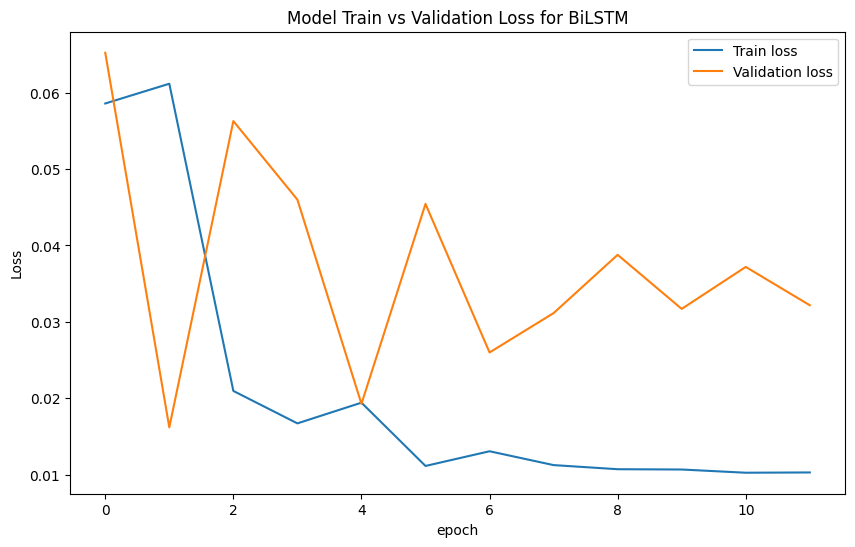

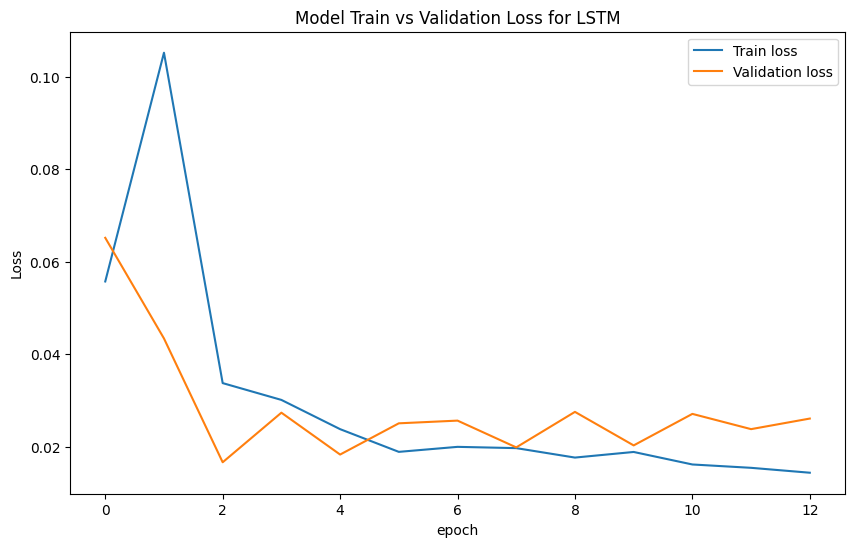

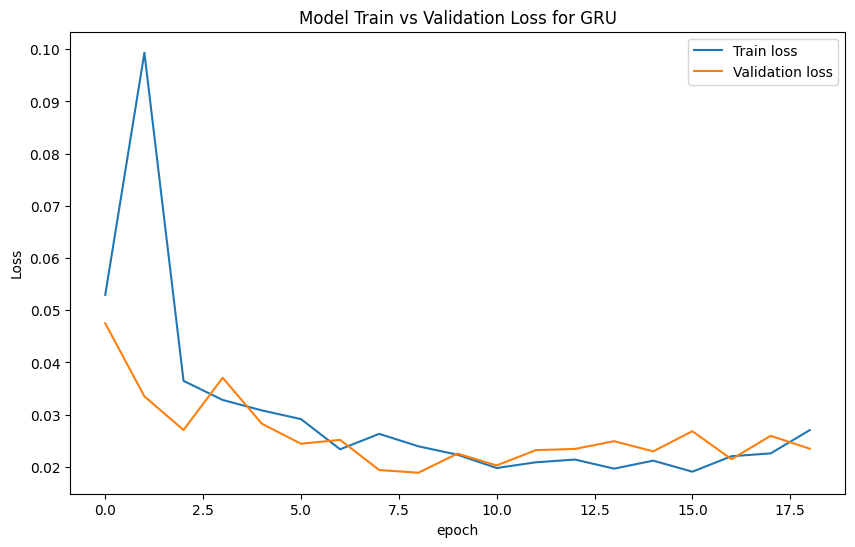

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

In [ ]:
# Note that I have to use scaler_y
y_test_zone_1 = scaler_y_zone_1.inverse_transform(y_test_zone_1)
y_train_zone_1 = scaler_y_zone_1.inverse_transform(y_train_zone_1)

# Make prediction using BiLSTM, LSTM and GRU


In [ ]:
def prediction_zone_1(model):
    prediction_zone_1 = model.predict(X_test_zone_1)
    prediction_zone_1 = scaler_y_zone_1.inverse_transform(prediction_zone_1)
    return prediction_zone_1

prediction_bilstm = prediction_zone_1(model_bilstm)
prediction_lstm = prediction_zone_1(model_lstm)
prediction_gru = prediction_zone_1(model_gru)


2/2 [==============================] - 0s 11ms/step


## Plot true future vs prediction

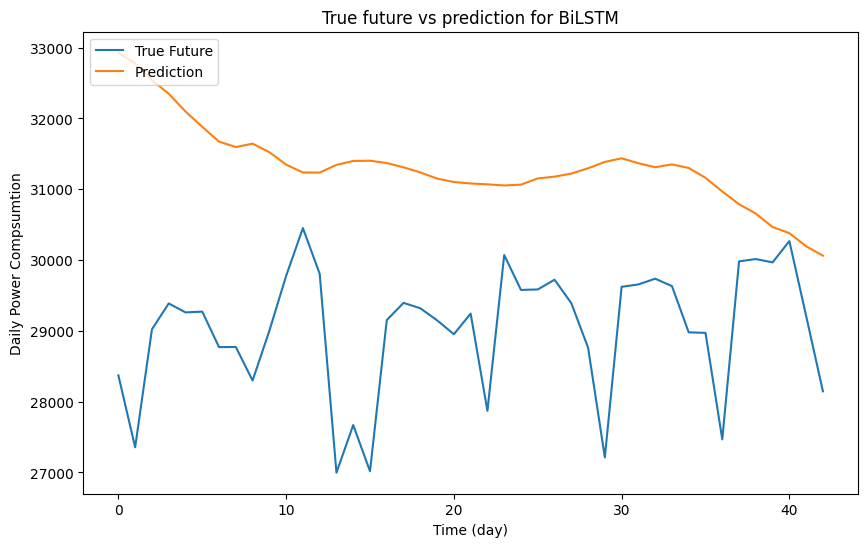

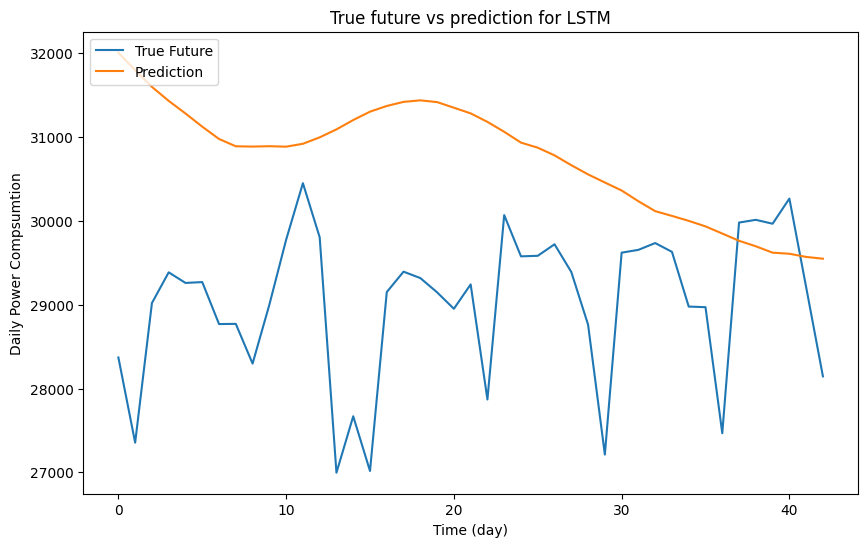

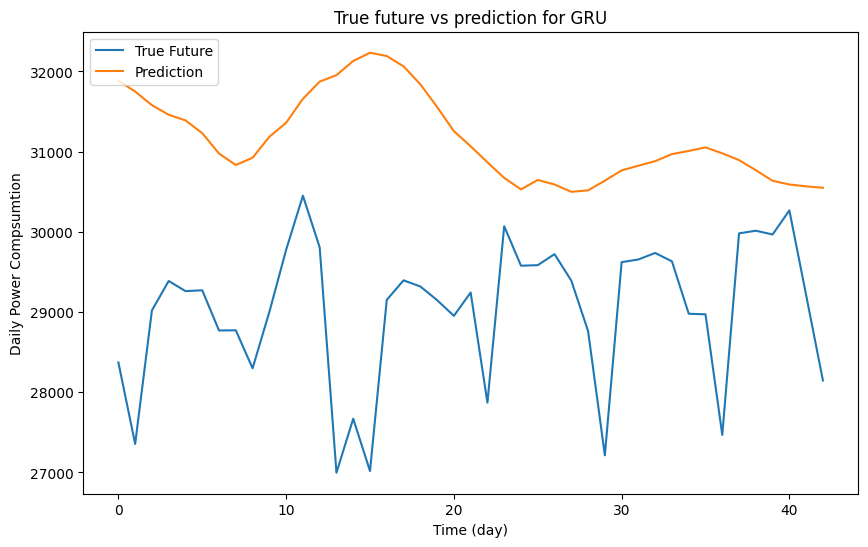

In [ ]:
def plot_future(prediction_zone_1, model_name, y_test_zone_1):

    plt.figure(figsize=(10, 6))

    range_future = len(prediction_zone_1)

    plt.plot(np.arange(range_future), np.array(y_test_zone_1), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction_zone_1),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily Power Compsumtion')


plot_future(prediction_bilstm, 'BiLSTM', y_test_zone_1)
plot_future(prediction_lstm, 'LSTM', y_test_zone_1)
plot_future(prediction_gru, 'GRU', y_test_zone_1)

## Calculate RMSE and MAE

In [ ]:
# Define a function to calculate MAE and RMSE in percentage
def evaluate_prediction_percentage(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    mean_actual = np.mean(actual)

    mae_percent = (mae / mean_actual) * 100
    rmse_percent = (rmse / mean_actual) * 100

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f} ({:.2f}%)'.format(mae, mae_percent))
    print('Root Mean Square Error: {:.4f} ({:.2f}%)'.format(rmse, rmse_percent))
    print('')

# Usage example
evaluate_prediction_percentage(prediction_bilstm, y_test_zone_1, 'Bidirectional LSTM')
evaluate_prediction_percentage(prediction_lstm, y_test_zone_1, 'LSTM')
evaluate_prediction_percentage(prediction_gru, y_test_zone_1, 'GRU')


Bidirectional LSTM:
Mean Absolute Error: 2297.8943 (7.92%)
Root Mean Square Error: 2582.5518 (8.90%)

LSTM:
Mean Absolute Error: 1797.4746 (6.19%)
Root Mean Square Error: 2122.8589 (7.31%)

GRU:
Mean Absolute Error: 2129.7691 (7.34%)
Root Mean Square Error: 2425.9553 (8.36%)



# Forecast power consumption in x years

In [ ]:
import pandas as pd

# Mengambil data dari URL
dataset = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/PrediksiEnergi/Buku1.csv'
df = pd.read_csv(dataset, sep=';')

# Mengubah kolom DateTime menjadi tipe data datetime
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%m/%d/%Y %H:%M")

# Mengambil bagian tanggal dari kolom DateTime
df['Date'] = df['DateTime'].dt.date

# Menghapus kolom 'DateTime'
df.drop(columns=["DateTime"], inplace=True)

# Menjadikan kolom 'Date' sebagai indeks
df.set_index('Date', inplace=True)

# Menampilkan lima baris pertama dari DataFrame yang telah dimodifikasi
df.head()

# Mengelompokkan data berdasarkan tanggal dan menghitung rata-rata per hari
daily_average = df.groupby('Date').mean()

# Menampilkan lima baris pertama dari DataFrame hasil perhitungan rata-rata per hari
daily_average.head()

#daily_average.to_csv('nama_file.csv', index=True)

# Mengubah indeks menjadi tipe data datetime
df.index = pd.to_datetime(df.index)

# Mengelompokkan data berdasarkan tanggal dan menghitung rata-rata per hari
daily_average = df.groupby(df.index).mean()

# Menampilkan lima baris pertama dari DataFrame hasil perhitungan rata-rata per hari
daily_average.head()

#daily_average.to_csv('nama_file.csv', index=True)

# Order of the variable are important
X_new = daily_average.loc['2018-01-01':'2018-12-12',:]
X_new


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
Date,,,,,
2018-01-01,2867.048611,2595.368056,264.208333,1278.458333,1286.361111
2018-01-02,1170.562500,3310.256944,74.562500,1394.173611,1402.034722
2018-01-03,1106.500000,1910.791667,74.215278,1356.263889,1574.097222
2018-01-04,2177.416667,1990.666667,76.291667,1356.381944,1362.847222
2018-01-05,1960.444444,2411.798611,82.270833,1471.798611,1508.812500
...,...,...,...,...,...
2018-12-08,1149.770833,4089.437500,73.381944,1352.930556,1147.868056
2018-12-09,1781.708333,2390.465278,76.909722,1248.576389,1651.986111
2018-12-10,2382.326389,1910.409722,80.166667,1000.111111,882.083333


In [ ]:
# Plot histoy and future data
def plot_history_future(y_train_zone_1, prediction_zone_1, model_name):

    plt.figure(figsize=(10, 6))

    range_history = len(y_train_zone_1)
    range_future = list(range(range_history, range_history + len(prediction_zone_1)))

    plt.plot(np.arange(range_history), np.array(y_train_zone_1), label='History')
    plt.plot(range_future, np.array(prediction_zone_1),label='Prediction')

    plt.title('History and prediction for ' + model_name)
    plt.legend(loc='upper right')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily Power Consumption')

4/4 [==============================] - 0s 32ms/step


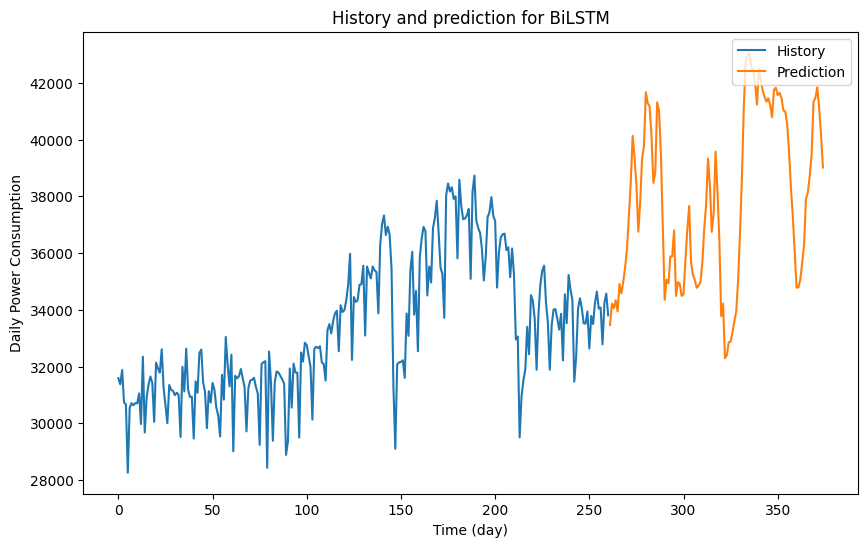

In [ ]:
def forecast(X_input_zone_1, time_steps):
    # Scale the unseen input with the scaler fitted on the training data
    X = input_scaler_zone_1.transform(X_input_zone_1)
    # Reshape unseen data to a 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)

    X_transformed = np.array(Xs)

    # Make prediction for unseen data using LSTM model
    prediction_zone_1 = model_bilstm.predict(X_transformed)
    prediction_actual = scaler_y_zone_1.inverse_transform(prediction_zone_1)
    return prediction_actual

prediction_zone_1 = forecast(X_new, TIME_STEPS)
plot_history_future(y_train_zone_1, prediction_zone_1,'BiLSTM')

4/4 [==============================] - 0s 15ms/step


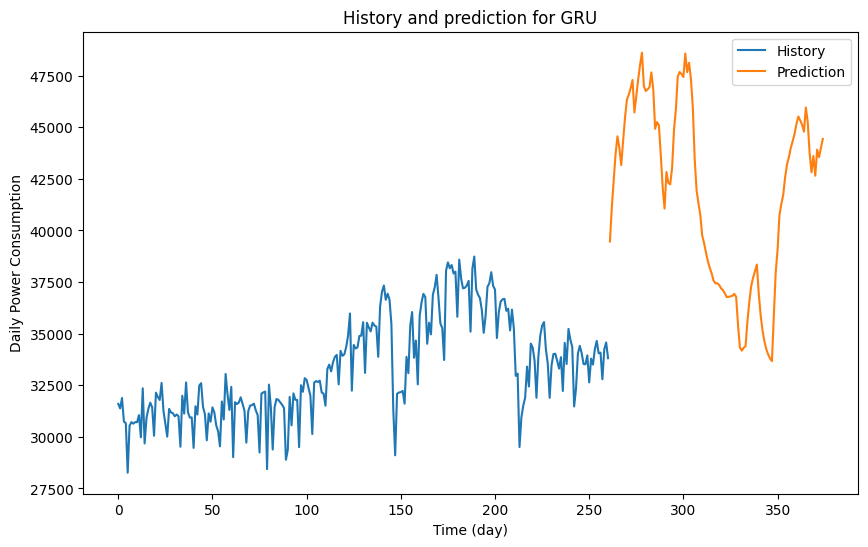

In [ ]:
def forecast(X_input_zone_1, time_steps):
    # Scale the unseen input with the scaler fitted on the training data
    X = input_scaler_zone_1.transform(X_input_zone_1)
    # Reshape unseen data to a 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)

    X_transformed = np.array(Xs)

    # Make prediction for unseen data using LSTM model
    prediction_zone_1 = model_gru.predict(X_transformed)
    prediction_actual = scaler_y_zone_1.inverse_transform(prediction_zone_1)
    return prediction_actual

prediction_zone_1 = forecast(X_new, TIME_STEPS)
plot_history_future(y_train_zone_1, prediction_zone_1,'GRU')

4/4 [==============================] - 0s 25ms/step


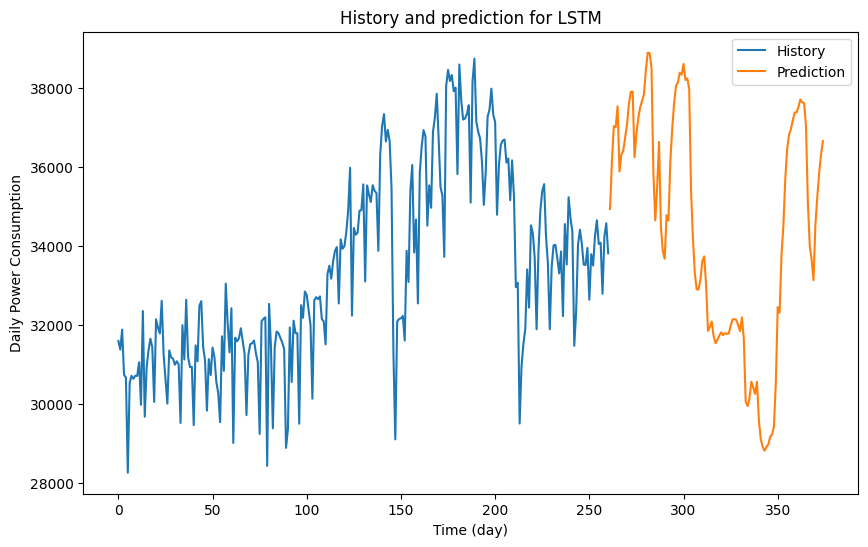

In [ ]:
def forecast(X_input_zone_1, time_steps):
    # Scale the unseen input with the scaler fitted on the training data
    X = input_scaler_zone_1.transform(X_input_zone_1)
    # Reshape unseen data to a 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)

    X_transformed = np.array(Xs)

    # Make prediction for unseen data using LSTM model
    prediction_zone_1 = model_lstm.predict(X_transformed)
    prediction_actual = scaler_y_zone_1.inverse_transform(prediction_zone_1)
    return prediction_actual

prediction_zone_1 = forecast(X_new, TIME_STEPS)
plot_history_future(y_train_zone_1, prediction_zone_1,'LSTM')